# Reviews data
Reviews data exploration, tag and will join back to listings


In [1]:
import os
from pathlib import Path # added to make the file locations dynamic and usable with Windows #Need to test on MAC
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# created this to find the main Airbnb folder (Windows & Mac compatible)
def GoToParentFolder(folder_name):
    path = Path(os.getcwd())
    path_string = str(path)

    while path_string[-len(folder_name):] != folder_name:
        path = Path(path.parent)
        path_string = str(path)
        print(path_string)
        
    return(str(path))

In [3]:
# Change working directory to the data folder
airbnb_main_directory = GoToParentFolder('Airbnb-Price-Prediction')

data_folder = os.path.join(airbnb_main_directory,'data','gdrive')
print(data_folder)

C:\Users\darie\Desktop\Python Practice\Airbnb-Price-Prediction
C:\Users\darie\Desktop\Python Practice\Airbnb-Price-Prediction\data\gdrive


In [7]:
#read reviews
reviews_csv = os.path.join(data_folder,'reviews.csv.gz')

reviews = pd.read_csv(reviews_csv,compression='gzip', sep=',')

#read listings
listings_csv = os.path.join(data_folder,'listings.csv.gz')

listings = pd.read_csv(listings_csv, compression='gzip', sep=',')

In [8]:
#to get all columns, set option
pd.set_option('display.max_columns', 107)
#to get text with no truncation
pd.set_option('display.max_colwidth', -1)

In [9]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2060,158,2008-09-22,2865,Thom,"very nice neighborhood,close enough to ""A"" train,\r\ncomfortable bed and clean home over all.\r\nJennys cat is very sweet and fun to play with, but wants to sleep in bed with you and won't shut up unless such privilages are granted . . .\r\nMeyow meyow meyow."
1,2595,17857,2009-11-21,50679,Jean,"Notre séjour de trois nuits.\r\nNous avons apprécier L'appartement qui est très bien situé. Agréable, propre et bien soigné. C'est idéal pour une famille de 3 ou 4 personnes.\r\nPetits soucis en arrivant il y avait personne pour nous recevoir, et il manquait le savon pour la douche, le liquide vaisselle, nous les avons reçu de surlendemain. Il y a aussi le bruit du Métro de NY, donc une première nuit difficile si on est pas habitué. Jennifer est correcte le remboursement de la caution était très rapide. A part ces petits détails notre court séjour c'est bien passé. \r\nSi j'ai la possibilité de revenir sur NY pour les vacances, je reprendrai à ""The Midtown Castle""\r\nJean\r\nPossession - Ile de La Réunion\r\n"
2,2595,19176,2009-12-05,53267,Cate,Great experience.
3,2595,19760,2009-12-10,38960,Anita,"I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theatre District. Everything worked just perfect with the keys etc. Thank you so much Jennifer, we had a great time in New York.\r\nAttention: it's on the 4th floor without a lift :-) but definetely worth it!"
4,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, enjoying to be in the center of the city, that never sleeps...short ways to everywhere in Manhattan, by subway or by walk. Midtown castle is a beauftiful and tastful place, Jennifer and Tori relaxed and friendly hosts - thats why we - the three Berliners - recommand that place! Good to have WiFi and a little kitchen too!"


In [10]:
#shape
reviews.shape

(1273976, 6)

In [11]:
listing_id = 2595

In [12]:
filt = listings['id'] == listing_id
listings[['number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']][filt].head()

,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0.38


In [13]:
filt = reviews['listing_id'] == listing_id
reviews['comments'][filt]

1     Notre séjour de trois nuits.\r\nNous avons apprécier L'appartement qui est très bien situé. Agréable, propre et bien soigné. C'est idéal pour une famille de 3 ou 4 personnes.\r\nPetits soucis en arrivant il y avait personne pour nous recevoir, et il manquait le savon pour la douche, le liquide vaisselle, nous les avons reçu de surlendemain. Il y a aussi le bruit du Métro de NY, donc une première nuit difficile si on est pas habitué. Jennifer est correcte le remboursement de la caution était très rapide.  A part ces petits détails notre court séjour c'est bien passé. \r\nSi j'ai la possibilité de revenir sur NY pour les vacances, je reprendrai à "The Midtown Castle"\r\nJean\r\nPossession - Ile de La Réunion\r\n                                                                                                                                                                                                                                                                                   

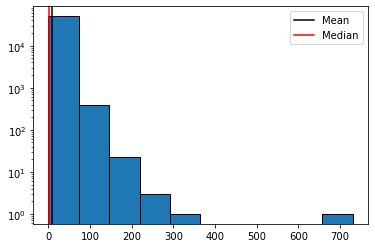

In [14]:
#number_of_reviews_ltm
filt = listings['number_of_reviews_ltm'] < 100

df = listings['number_of_reviews_ltm']
bins = 10
mean = df.mean()
median = df.median()

plt.hist(df, bins=bins, edgecolor='black', log=True)
plt.axvline(mean, color='black', label='Mean')
plt.axvline(median, color='red', label='Median')

plt.legend()
plt.show()

correlation = 0.7595040157539382


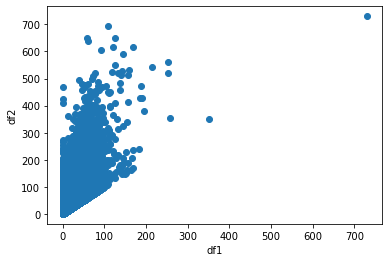

In [15]:
#'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
df1 = listings['number_of_reviews_ltm']
df2 = listings['number_of_reviews']

print('correlation = {}'.format(df1.corr(df2)))

#chart
plt.scatter(df1, df2)
plt.xlabel('df1')
plt.ylabel('df2')
plt.show()

#correlation almost 0.76, i think these are similar features

correlation = 0.7699352222042496


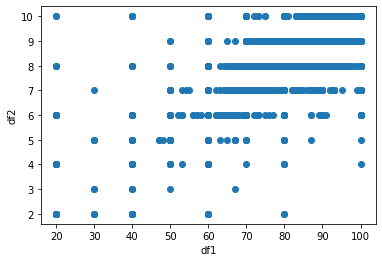

In [16]:
# 'review_scores_rating', 'review_scores_accuracy', 
# 'review_scores_cleanliness', 'review_scores_checkin', 
# 'review_scores_communication', 'review_scores_location', 
# 'review_scores_value', 'reviews_per_month'

df1 = listings['review_scores_rating']
df2 = listings['review_scores_value']

print('correlation = {}'.format(df1.corr(df2)))

#chart
plt.scatter(df1, df2)
plt.xlabel('df1')
plt.ylabel('df2')
plt.show()

#either take review_scores_rating or take individual review scores